In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
Hrt=pd.read_csv("logistic_regression_dataset.csv")
#Hrt.isna().sum()
Hrtclea=Hrt.dropna(axis=0,how='any')
#Hrtclea
one_hot_encoded_data = pd.get_dummies(Hrtclea ['sex'])
one_hot_encoded_data1 = pd.get_dummies(Hrtclea ['is_smoking'])
Hrtclea=Hrtclea.drop('sex',axis=1)
Hrtclea=Hrtclea.drop('is_smoking',axis=1)
Hrtclea=Hrtclea.join(one_hot_encoded_data)
Hrtclea=Hrtclea.join(one_hot_encoded_data1)
#Hrtclea
Hrtclea=Hrtclea.drop(['id'], axis=1)



Accuracy=0.84
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       612
         1.0       1.00      0.03      0.05       120

    accuracy                           0.84       732
   macro avg       0.92      0.51      0.48       732
weighted avg       0.87      0.84      0.77       732



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


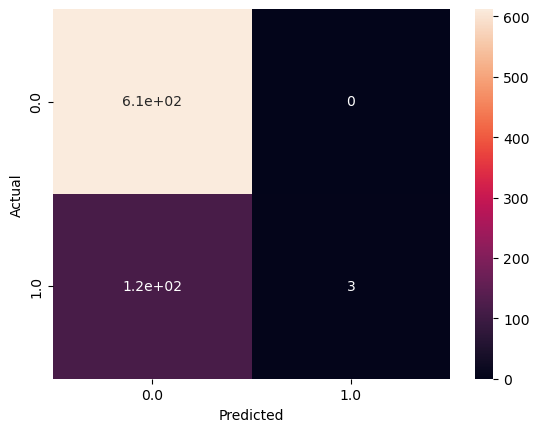

In [46]:
x = Hrtclea[['M', 'F','NO','YES','prevalentHyp','cigsPerDay','age','totChol']]
y = Hrtclea['TenYearCHD']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))